ANALISA TWEET BERBAHASA INDONESIA MENGGUNAKAN METODE DESCRIPTIVE ANALISIS

IMPORTING LIBRABRY

In [66]:
import pandas as pd #memanggil library pandas alias pd untuk mengatur tata letak data
import sqlite3 #memanggil lib sqlite untuk mengakses dan mengolah database
import csv
import seaborn as sns
import matplotlib.pyplot as plt

LOAD DATASET FROM KAGGLE

A. PEMBACAAN DATASET

DATA

In [67]:
data = pd.read_csv('data.csv', encoding='latin-1')

In [68]:
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


ABUSIVE DICT

In [69]:
abusive_dict = pd.read_csv("abusive.csv")
abusive_dict

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


ALAY DICT

In [70]:

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

In [71]:
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


SHAPE DATA HATESPEECH DARI DATA UJI

In [72]:
data.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [73]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


SHAPE DATA ABUSIVE DARI DATA UJI

In [74]:
data.Abusive.value_counts()

0    8126
1    5043
Name: Abusive, dtype: int64

In [75]:
print("Negatif tweet shape: ", data[(data['HS'] == 1) | (data['Abusive'] == 1)].shape)
print("Neutral shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Negatif tweet shape:  (7309, 13)
Neutral shape:  (5860, 13)


In [76]:
print("Toxic shape: ", data[(data['HS'] == 1) | (data['Abusive'] == 1)].shape)
print("Non-toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


Preprocess

In [77]:
import re
def lowercase(text):
    return text.lower()


def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))


remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis


In [78]:
def remove_stopword(text):
    text = ' '.join(['' if word in abusive.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    return text

In [79]:
data['Tweet'] = data['Tweet'].apply(preprocess)

In [80]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak dan kawan kawan xf0 x9f x98 x8...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue baru saja selesai re watch aldnoah zero pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,nah admin belanja satu lagi po terbaik nak mak...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak lagi kalau sambil ngewe,0,1,0,0,0,0,0,0,0,0,0,0


EXPLORE DATA

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [82]:
data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
## menghitung jumlah kata
def split_sentences(s):
  return len(s.split())

data['total_kata'] = data['Tweet'].apply(split_sentences)
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_kata
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,22
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,19
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,39
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,14
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0,10
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,4
13166,hati hati bisu tidak dan lagi bosan duh xf0 x...,0,0,0,0,0,0,0,0,0,0,0,0,12
13167,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,18


SUM

In [84]:
sum_HS = data['total_kata'].groupby(data['HS']).sum()
sum_HS = sum_HS.to_list()
sum_HS

[151213, 92385]

In [85]:
sum_ABS = data['total_kata'].groupby(data['Abusive']).sum()
sum_ABS = sum_ABS.to_list()
sum_ABS

[164551, 79047]

Text(0, 0.5, 'Jumlah kata')

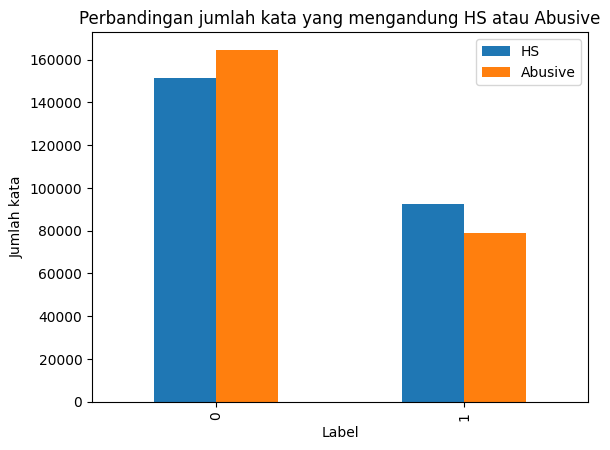

In [86]:
plotdata = pd.DataFrame({
    "HS":sum_HS,
    "Abusive":sum_ABS
    }, 
    index=["0", "1"]
)
plotdata.plot(kind="bar")
plt.title("Perbandingan jumlah kata yang mengandung HS atau Abusive")
plt.xlabel("Label")
plt.ylabel("Jumlah kata")

MEAN

In [87]:
# mencari mean dari label Hate Speech
mean_HS = data['total_kata'].groupby(data['HS']).mean()
mean_HS = mean_HS.to_list()
mean_HS

[19.875525762355416, 16.61301924114368]

In [88]:
# mencari mean dari label Abusive
mean_ABS = data['total_kata'].groupby(data['HS']).mean()
mean_ABS = mean_ABS.to_list()
mean_ABS

[19.875525762355416, 16.61301924114368]

Text(0, 0.5, 'Jumlah kata')

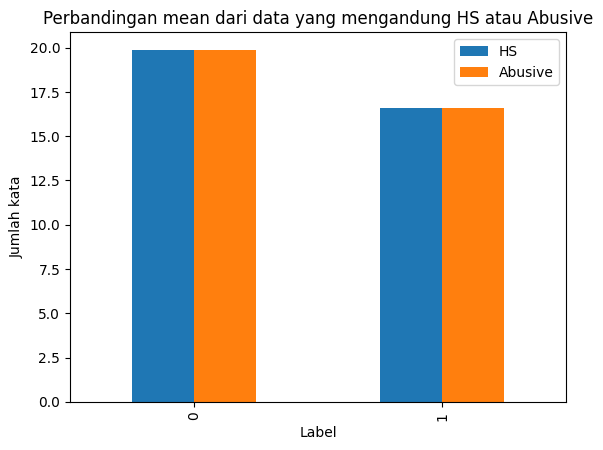

In [89]:
plotdata = pd.DataFrame({
    "HS":mean_HS,
    "Abusive":mean_ABS
    }, 
    index=["0", "1"]
)
plotdata.plot(kind="bar")
plt.title("Perbandingan mean dari data yang mengandung HS atau Abusive")
plt.xlabel("Label")
plt.ylabel("Jumlah kata")

CEK NILAI NULL

In [90]:
data.isnull().sum().sort_values(ascending=False)

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
total_kata       0
dtype: int64

DROP DUPLICATE

In [91]:
data.duplicated().sum()

227

In [92]:
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_kata
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,22
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,19
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,39
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,14
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12937,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0,10
12938,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,4
12939,hati hati bisu tidak dan lagi bosan duh xf0 x...,0,0,0,0,0,0,0,0,0,0,0,0,12
12940,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,18


Save Preprocessed Data

In [93]:
data.to_csv('preprocessed_indonesian_toxic_tweet.csv', index=False)

VISUALISASI DATA

PLOT

In [94]:
data['HS'].value_counts()

0    7462
1    5480
Name: HS, dtype: int64

<Axes: xlabel='HS', ylabel='count'>

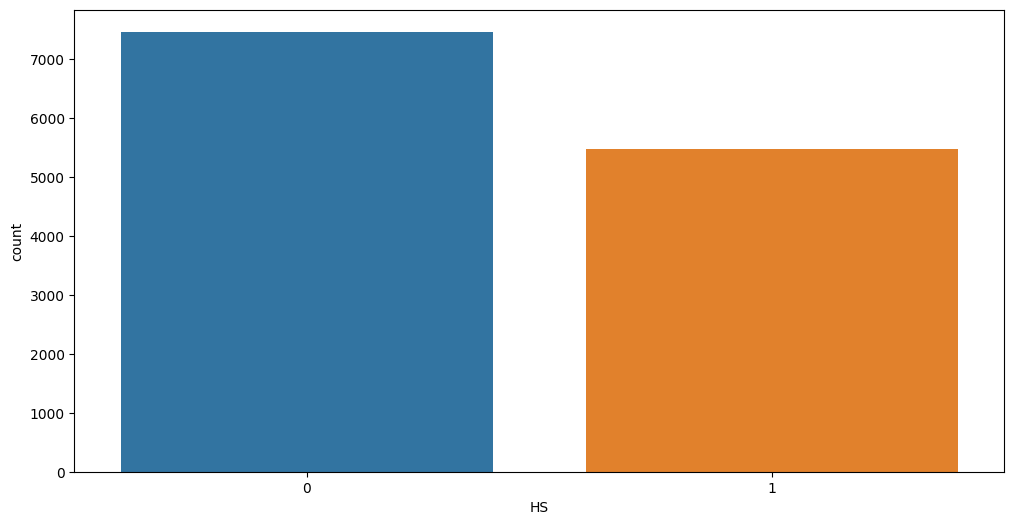

In [95]:
# Visualisasi Data yang Mengandung Hate Speech(Kebencian), 0 = Tdk Mengandung, 1 = Mengandung
plt.figure(figsize=(12,6))
sns.countplot(x='HS',data=data)

In [96]:
data['Abusive'].value_counts()

0    7985
1    4957
Name: Abusive, dtype: int64

<Axes: xlabel='Abusive', ylabel='count'>

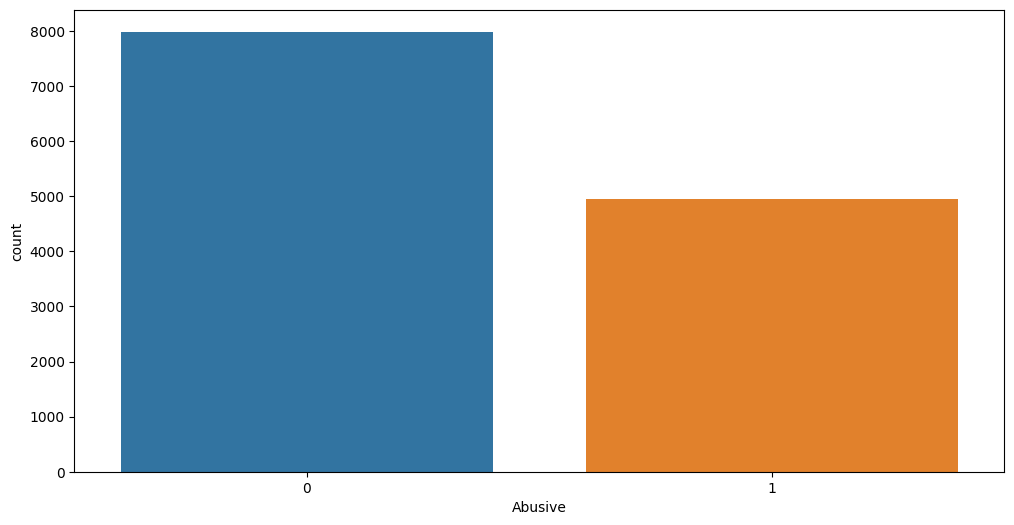

In [97]:
# Visualisasi Data yang Mengandung Abbusive(Kata Kasar)), 0 = Tdk Mengandung, 1 = Mengandung
plt.figure(figsize=(12,6))
sns.countplot(x='Abusive',data=data)

In [98]:
# check jumlah data yang mengandung ujaran kebencian
temp_HS = data.groupby('HS').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp_HS.style.background_gradient(cmap='Purples')
temp_HS

,HS,Tweet
0,0,7462
1,1,5480


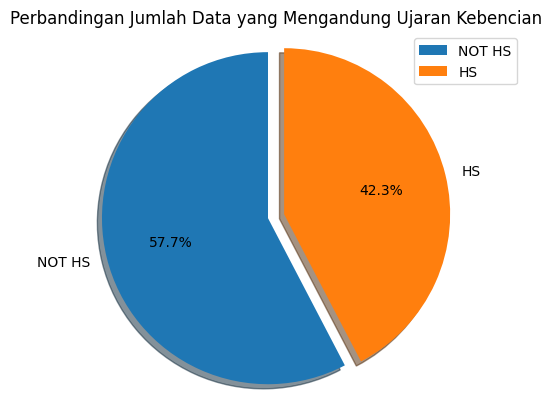

In [99]:
explode = (0.1, 0)

plt.pie(temp_HS['Tweet'],labels=['NOT HS','HS'], startangle=90, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.title("Perbandingan Jumlah Data yang Mengandung Ujaran Kebencian")
plt.legend()
plt.show()

In [100]:
# check jumlah data yang mengandung ujaran kebencian
temp_ABS = data.groupby('Abusive').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp_ABS.style.background_gradient(cmap='Purples')

,Abusive,Tweet
0,0,7985
1,1,4957


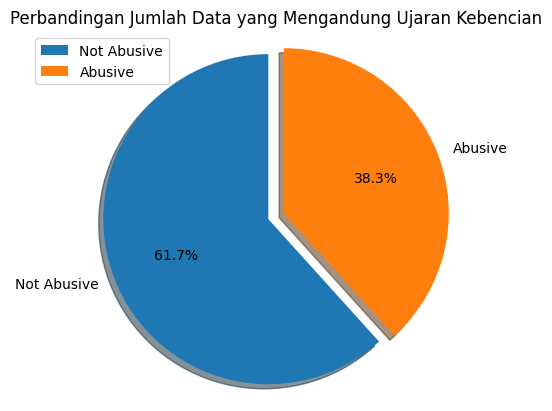

In [101]:
explode = (0.1, 0)

plt.pie(temp_ABS['Tweet'],labels=['Not Abusive','Abusive'], startangle=90, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.title("Perbandingan Jumlah Data yang Mengandung Ujaran Kebencian")
plt.legend()
plt.show()

CREATING DATABASE USING SQLITE

In [102]:
import sqlite3
import pandas as pd


In [103]:
conn = sqlite3.connect('Tweet_cleaning.db') #Membuat file database 
cursor = conn.cursor()
print("Database created and Successfully Connected to SQLite")

sqlite_select_Query = "select sqlite_version();"
cursor.execute(sqlite_select_Query)
record = cursor.fetchall()
print("SQLite Database Version is: ", record)

cursor.close()

Database created and Successfully Connected to SQLite
SQLite Database Version is:  [('3.40.1',)]


In [104]:
create_sql = "CREATE TABLE IF NOT EXISTS testing(old_tweet TEXT, new_tweet TEXT)"
cursor = conn.cursor()
cursor.execute(create_sql)

In [105]:
print(data.columns)

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong', 'total_kata'],
      dtype='object')


In [106]:
columns_list = data.columns.tolist()
print(columns_list)


['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong', 'total_kata']


In [107]:
cursor.execute("PRAGMA table_info(testing)")
print(cursor.fetchall())




[(0, 'old_tweet', 'TEXT', 0, None, 0), (1, 'new_tweet', 'TEXT', 0, None, 0)]


In [108]:
print(data.head())

                                               Tweet  HS  Abusive  \
0   di saat semua cowok berusaha melacak perhatia...   1        1   
1   siapa yang telat memberi tau kamu edan sarap ...   0        1   
2  41 kadang aku berpikir kenapa aku tetap percay...   0        0   
3   aku itu aku dan ku tau matamu sipit tapi dili...   0        0   
4   kaum cebong kafir sudah kelihatan dongoknya d...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  total_kata  
0         1        1            0          0          22  
1         

In [109]:
data['new_column_name'] = ...

In [110]:
cursor.execute("PRAGMA table_info(testing)")
print(cursor.fetchall())


[(0, 'old_tweet', 'TEXT', 0, None, 0), (1, 'new_tweet', 'TEXT', 0, None, 0)]


In [111]:
[(0, 'old_tweet', 'TEXT', 0, None, 0), 
(1, 'new_tweet', 'TEXT', 0, None, 0), 
(2, 'new_column_name', 'INTEGER', 0, None, 0), 
(3, 'HS', 'TEXT', 0, None, 0)]


[(0, 'old_tweet', 'TEXT', 0, None, 0),
 (1, 'new_tweet', 'TEXT', 0, None, 0),
 (2, 'new_column_name', 'INTEGER', 0, None, 0),
 (3, 'HS', 'TEXT', 0, None, 0)]

In [112]:
data.rename

<bound method DataFrame.rename of                                                    Tweet  HS  Abusive  \
0       di saat semua cowok berusaha melacak perhatia...   1        1   
1       siapa yang telat memberi tau kamu edan sarap ...   0        1   
2      41 kadang aku berpikir kenapa aku tetap percay...   0        0   
3       aku itu aku dan ku tau matamu sipit tapi dili...   0        0   
4       kaum cebong kafir sudah kelihatan dongoknya d...   1        1   
...                                                  ...  ..      ...   
12937   jangan asal berbicara ndasmu congor kamu yang...   1        1   
12938                            kasur mana enak kunyuk    0        1   
12939   hati hati bisu tidak dan lagi bosan duh xf0 x...   0        0   
12940   bom yang real mudah terdeteksi bom yang terku...   0        0   
12941     mana situ memberi itu cuma foto ya kutil onta    1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0        

In [113]:
import pandas as pd

# create a Pandas DataFrame object from your data
data = pd.DataFrame({
   'HS': ['yes', 'no', 'yes', 'no'],
   'Abusive': [0, 1, 1, 0],
   'HS_Individual': [1, 0, 1, 0],
   'HS_Group': [0, 1, 0, 1],
   'HS_Religion': [0, 0, 1, 0],
   'HS_Race': [0, 0, 0, 1],
   'HS_Physical': [1, 0, 1, 0],
   'HS_Gender': [0, 1, 0, 1],
   'HS_Other': [0, 1, 0, 1],
   'HS_Weak': [1, 0, 1, 0],
   'HS_Moderate': [0, 1, 0, 1],
   'HS_Strong': [0, 0, 1, 0]
})

# iterate over the rows of the DataFrame using itertuples()
for row in data.itertuples():
    print(row)


Pandas(Index=0, HS='yes', Abusive=0, HS_Individual=1, HS_Group=0, HS_Religion=0, HS_Race=0, HS_Physical=1, HS_Gender=0, HS_Other=0, HS_Weak=1, HS_Moderate=0, HS_Strong=0)
Pandas(Index=1, HS='no', Abusive=1, HS_Individual=0, HS_Group=1, HS_Religion=0, HS_Race=0, HS_Physical=0, HS_Gender=1, HS_Other=1, HS_Weak=0, HS_Moderate=1, HS_Strong=0)
Pandas(Index=2, HS='yes', Abusive=1, HS_Individual=1, HS_Group=0, HS_Religion=1, HS_Race=0, HS_Physical=1, HS_Gender=0, HS_Other=0, HS_Weak=1, HS_Moderate=0, HS_Strong=1)
Pandas(Index=3, HS='no', Abusive=0, HS_Individual=0, HS_Group=1, HS_Religion=0, HS_Race=1, HS_Physical=0, HS_Gender=1, HS_Other=1, HS_Weak=0, HS_Moderate=1, HS_Strong=0)


In [114]:
cursor.execute("SELECT * FROM testing")
result = cursor.fetchall()
print(result)

[]


In [115]:

import sqlite3
import pandas as pd

# Buat koneksi ke database
conn = sqlite3.connect('tweet_cleanning.db')

# Buat dataframe
df = pd.read_csv('data_clean.csv')

# Simpan dataframe ke tabel di SQLite
df.to_sql('nama_tabel', conn, if_exists='replace', index=False)

# Simpan perubahan dan tutup koneksi
conn.commit()
conn.close()

